<a href="https://colab.research.google.com/github/Zejabati/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import umap
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [ ]:
# load data
data = pd.read_csv('DataMining_HWI_Dataset.csv')

print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [ ]:
data.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.shape

(5000, 20)

In [ ]:
data.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough'],
      dtype='object')

**Step 2**

In [ ]:
Y=data['rent']
# X for step 3,4,final
X=data.drop(columns=['rent','rental_id','neighborhood','building_id'])
# X_droped for step 2
X_droped= X.drop(columns=['submarket','borough'])

X.shape



(5000, 16)

In [ ]:
X.head(2)

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,submarket,borough
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,All Upper East Side,Manhattan
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,All Downtown,Manhattan


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_droped,Y, test_size=0.2)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
r2_score(y_test, y_predict)

0.7343946046073938

In [ ]:
X.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,submarket,borough
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,All Upper East Side,Manhattan
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,All Downtown,Manhattan
2,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Northwest Queens,Queens
3,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,All Midtown,Manhattan
4,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,All Downtown,Manhattan


**Step 3**

In [ ]:
X_dummies = pd.get_dummies(X,columns=['submarket','borough'])
X_dummies.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,submarket_All Downtown,submarket_All Midtown,submarket_All Upper East Side,submarket_All Upper Manhattan,submarket_All Upper West Side,submarket_Central Queens,submarket_East Brooklyn,submarket_North Brooklyn,submarket_Northeast Queens,submarket_Northwest Brooklyn,submarket_Northwest Queens,submarket_Prospect Park,submarket_South Brooklyn,submarket_South Queens,submarket_The Rockaways,borough_Brooklyn,borough_Manhattan,borough_Queens
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies,Y, test_size=0.2)
model = LinearRegression(normalize=False)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
r2_score(y_test, y_predict)

0.80168339311738

# step 4

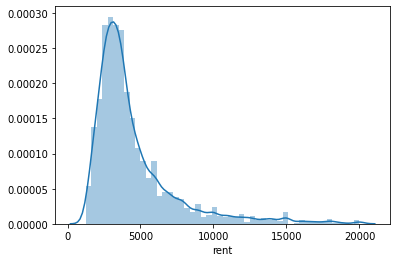

In [ ]:
sns.distplot(Y)
plt.show()

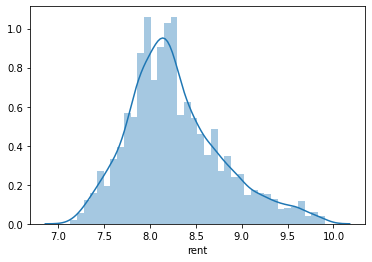

In [ ]:
Y_log = np.log(Y)
sns.distplot(Y_log)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies,Y_log, test_size=0.2)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
r2_score(y_test, y_predict)

-1.3267526086771694e+20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies,Y_log, test_size=0.2)
model = LinearRegression(normalize=False)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
r2_score(y_test, y_predict)

0.8423159048711364

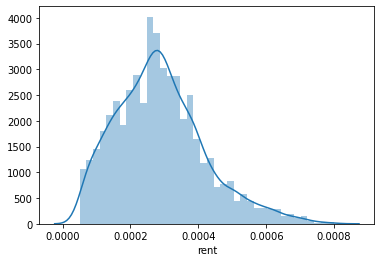

In [ ]:
sns.distplot(1/Y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies,1/Y, test_size=0.2)
model = LinearRegression(normalize=False)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
r2_score(y_test, y_predict)

0.8191719926366454

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies,1/Y, test_size=0.2)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
r2_score(y_test, y_predict)

0.7992418417772884

In [ ]:
score = []

for i in np.arange(0, 100, 1):
    X_train, X_test, Y_train, Y_test = train_test_split(X_dummies,Y_log, test_size=0.2)
    reg = LinearRegression(normalize=False)
    reg.fit(X_train, Y_train)
    r2_score(Y_test, reg.predict(X_test))
    score.append(r2_score(Y_test, reg.predict(X_test)))

np.mean(score)


0.854028216609156

**High Correlation Filter**

In [ ]:
corr= X.corr()
corr

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
bedrooms,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797
has_roofdeck,-0.012395,0.044597,0.038302,-0.021765,0.079554,-0.055064,-0.089593,1.000000,0.331626,0.506101,0.535333,0.369123,0.145139,0.579826
has_washer_dryer,-0.002582,0.052827,0.052746,-0.017840,0.060379,-0.031511,-0.082366,0.331626,1.000000,0.356328,0.410523,0.471480,0.159091,0.376372
has_doorman,-0.034031,0.044997,0.046402,-0.006722,0.123108,-0.058163,-0.175022,0.506101,0.356328,1.000000,0.728208,0.374312,0.157709,0.648138


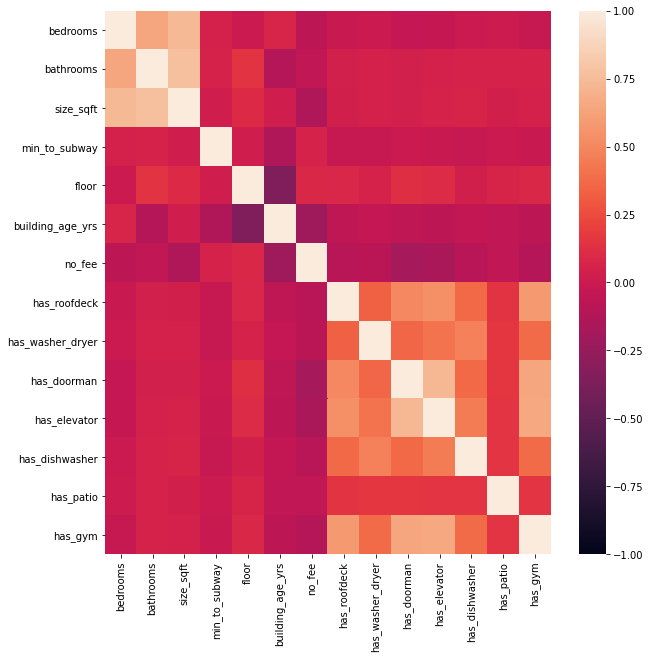

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, vmin=-1, vmax=1)

In [ ]:
X.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym',
       'submarket', 'borough'],
      dtype='object')

In [ ]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features/ Xcorr: x after High Correlation Filter
Xcorr=X.drop(to_drop, axis=1, inplace=False)
Xcorr.columns

Index(['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'building_age_yrs',
       'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'submarket',
       'borough'],
      dtype='object')

In [ ]:
#X_dummiescorr: x after High Correlation Filter and using get_dummies
X_dummiescorr = pd.get_dummies(Xcorr,columns=['submarket','borough'])

score = []

for i in np.arange(0, 100, 1):
    X_train, X_test, Y_train, Y_test = train_test_split(X_dummiescorr,Y_log, test_size=0.2)
    reg = LinearRegression(normalize=False)
    reg.fit(X_train, Y_train)
    r2_score(Y_test, reg.predict(X_test))
    score.append(r2_score(Y_test, reg.predict(X_test)))

np.mean(score)


0.7692567725614283

**ICA**

In [ ]:
X_dummies.shape

(5000, 32)

In [ ]:
transformer = FastICA(n_components=28,random_state=0)
# X_transformed: dimensionality reduction using ICA method for X_dummies
X_transformed = transformer.fit_transform(X_dummies)
X_transformed.shape

(5000, 28)

In [ ]:
score = []

for i in np.arange(0, 100, 1):
    X_train, X_test, Y_train, Y_test = train_test_split(X_transformed,Y_log, test_size=0.2)
    reg = LinearRegression(normalize=False)
    reg.fit(X_train, Y_train)
    r2_score(Y_test, reg.predict(X_test))
    score.append(r2_score(Y_test, reg.predict(X_test)))

np.mean(score)

0.85454989520325

**UMAP**

In [ ]:
X1=data.drop(columns=['rent','rental_id','building_id'])
X1_dummies = pd.get_dummies(X1,columns=['submarket','borough','neighborhood'])
X1_dummies.shape

(5000, 125)

In [ ]:
reducer = umap.UMAP(n_components=110)
embedding = reducer.fit_transform(X1_dummies)
embedding.shape

(5000, 110)

In [ ]:
score = []

for i in np.arange(0, 100, 1):
    X_train, X_test, Y_train, Y_test = train_test_split(embedding,Y_log, test_size=0.2)
    reg = LinearRegression(normalize=False)
    reg.fit(X_train, Y_train)
    r2_score(Y_test, reg.predict(X_test))
    score.append(r2_score(Y_test, reg.predict(X_test)))

np.mean(score)

0.6574575565530977

**Ridge**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies,Y_log, test_size=0.2)
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
y_train=preprocessing.scale(y_train)
y_test=preprocessing.scale(y_test)

rr = Ridge(alpha=0.01,normalize=False)
rr.fit(X_train, y_train)
pred_train_rr= rr.predict(X_train)
print('MSE_train:',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('r2_score_train:',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('MSE_test:',np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print('r2_score_test:',r2_score(y_test, pred_test_rr))



MSE_train: 0.3791018984561559
r2_score_train: 0.8562817505869385
MSE_test: 0.3718145267822194
r2_score_test: 0.8617539576737143


 **Lasso**

In [ ]:
model_lasso = Lasso(alpha=0.01,normalize=False)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
print('MSE_train:',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('r2_score_train:',r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print('MSE_test:',np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('r2_score_test:',r2_score(y_test, pred_test_lasso))

MSE_train: 0.3815272061201945
r2_score_train: 0.8544369909901187
MSE_test: 0.3737393941516346
r2_score_test: 0.8603188652591691


**Elastic** **Net**

In [ ]:
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train)
pred_train_enet= model_enet.predict(X_train)
print('MSE_train:',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('r2_score_train:',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print('MSE_test:',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('r2_score_test:',r2_score(y_test, pred_test_enet))

MSE_train: 0.380124346674705
r2_score_train: 0.8555054810651287
MSE_test: 0.3722495439869019
r2_score_test: 0.8614302770015436
